## Final Project

### Future Sales Prediction - Leveraging Machine Learning and Tableau Time series Forecasting

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv("Sales.csv")

In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## Checking for null values

In [14]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Dropping column

In [15]:
df01=df.drop('Postal Code',axis=1).reset_index(drop=True)

In [16]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(1), int64(1), object(15)
memory usage: 1.

## Splitting date/ also I am splitting for day later in the notebook before running the ungrouped model

In [17]:
def dt(df):
    df['Order_date_Updated'] = pd.to_datetime(df["Order Date"])
    df['Order month'] = df['Order_date_Updated'].dt.month
    df['Order year'] = df['Order_date_Updated'].dt.year
    return df

In [18]:
df01=dt(df01)

/var/folders/6x/86vt80p56r33nt6627tff6340000gn/T/ipykernel_75258/1063563053.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_date_Updated'] = pd.to_datetime(df["Order Date"])


In [19]:
df01

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_date_Updated,Order month,Order year
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08-11,8,2017
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,8,2017
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,12,2017
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,11,2016
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05-21,5,2017
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-12-01,12,2016
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016-12-01,12,2016
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-12-01,12,2016


## Check for Unique Values

In [20]:
def get_unique_values(column):
    return column.unique()
# Iterate through each column in the DataFrame and print its unique values
for column in df.columns:
    unique_values = get_unique_values(df01[column])
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'Row ID':
[   1    2    3 ... 9798 9799 9800]
Unique values in column 'Order ID':
['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']
Unique values in column 'Order Date':
['08/11/2017' '12/06/2017' '11/10/2016' ... '18/06/2015' '28/02/2018'
 '09/05/2016']
Unique values in column 'Ship Date':
['11/11/2017' '16/06/2017' '18/10/2016' ... '12/03/2015' '06/04/2018'
 '13/05/2016']
Unique values in column 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique values in column 'Customer ID':
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'J

KeyError: 'Postal Code'

### Checking for outliers and trimming

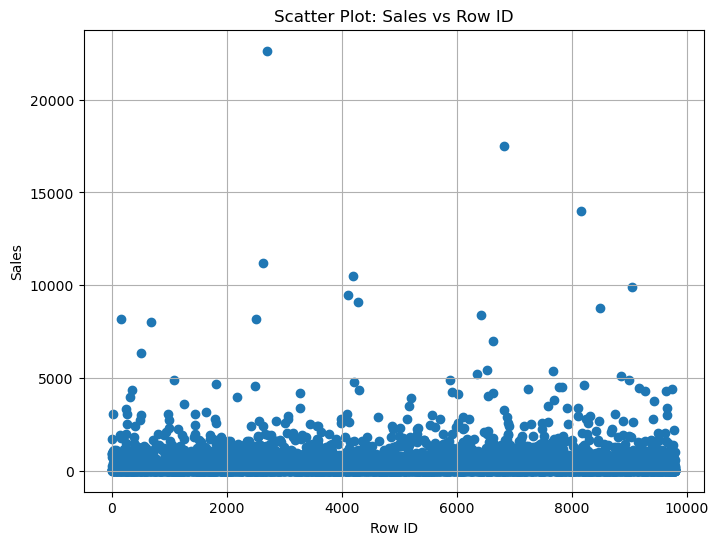

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame named 'df'
# Replace the code below with your actual data loading code if needed
# Example: df = pd.read_csv('your_file.csv')

# Scatter plot between "Sales" and row index (row id)
plt.figure(figsize=(8, 6))
plt.scatter(df01.index, df01['Sales'])
plt.title("Scatter Plot: Sales vs Row ID")
plt.xlabel("Row ID")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


Removing outliers above 99.0 percentile


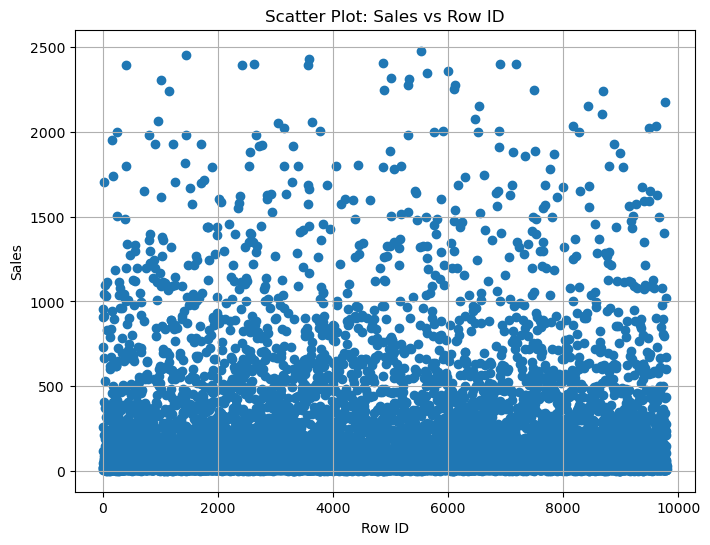

Removing outliers above 99.9 percentile


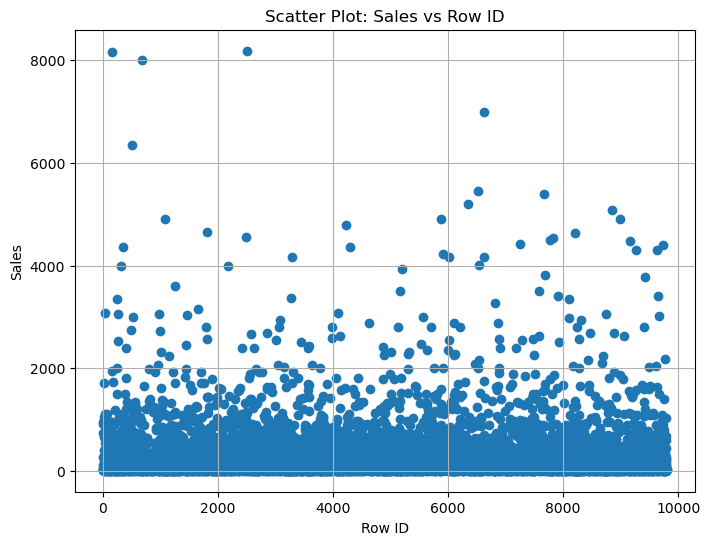

Removing outliers above 95.0 percentile


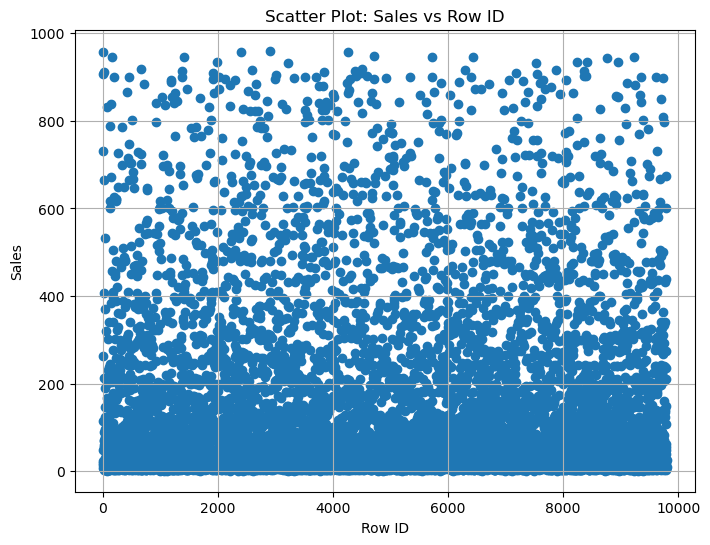

Removing outliers above 85.0 percentile


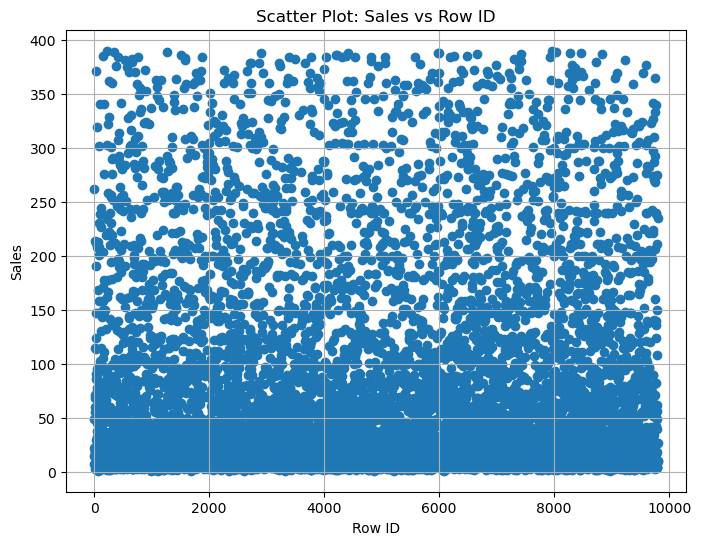

Removing outliers above 75.0 percentile


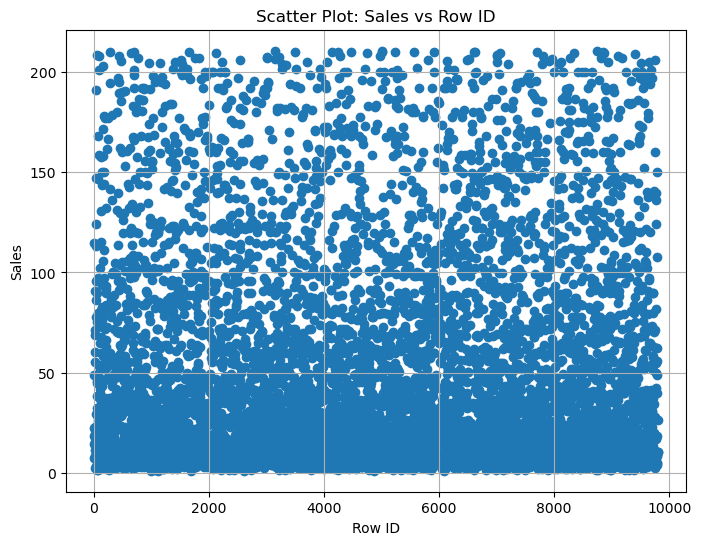

Removing outliers above 80.0 percentile


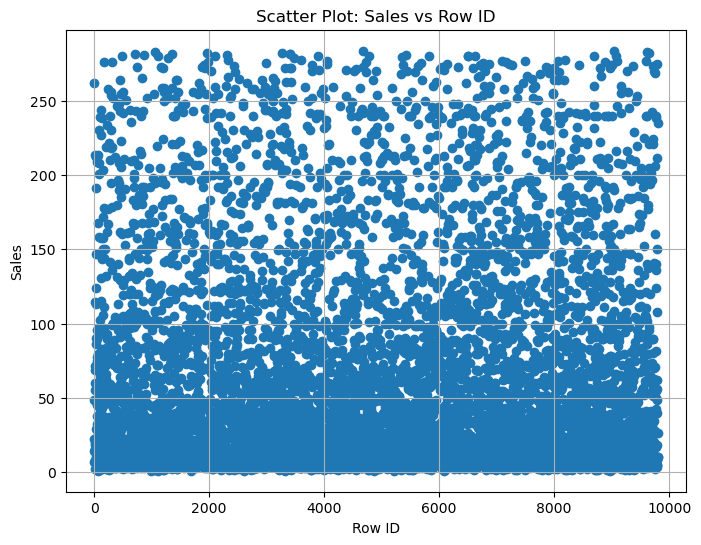

Removing outliers above 90.0 percentile


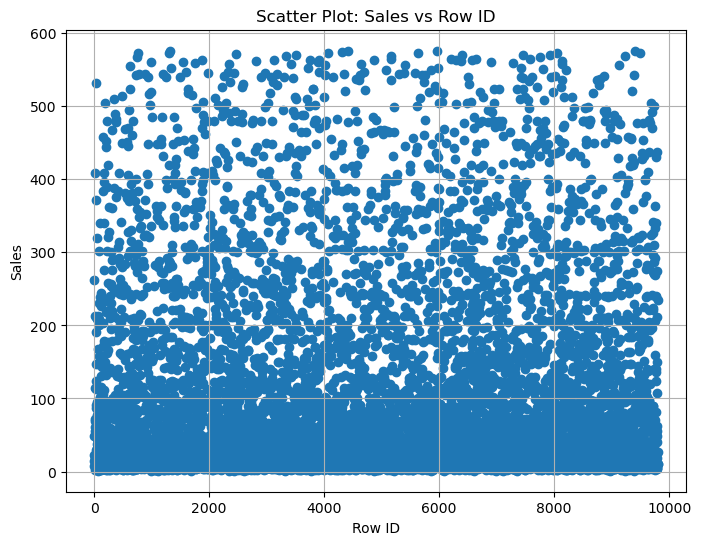

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame named 'df'
# Replace the code below with your actual data loading code if needed
# Example: df = pd.read_csv('your_file.csv')

# Scatter plot between "Sales" and row index (row id)
def plot_after_quantile(df, percentage):
    q_hi = df['Sales'].quantile(percentage)
    q_low = df['Sales'].quantile(0.001)
    df01= df[(df['Sales']>q_low) & (df['Sales']<q_hi)]
    plt.figure(figsize=(8, 6))
    plt.scatter(df01.index, df01['Sales'])
    plt.title("Scatter Plot: Sales vs Row ID")
    plt.xlabel("Row ID")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.show()
    return df01


for i in [0.99, 0.999, 0.95, 0.85, 0.75, 0.80, 0.90]:
    print("Removing outliers above " + str(i*100) + " percentile")
    plot_after_quantile(df01, i)


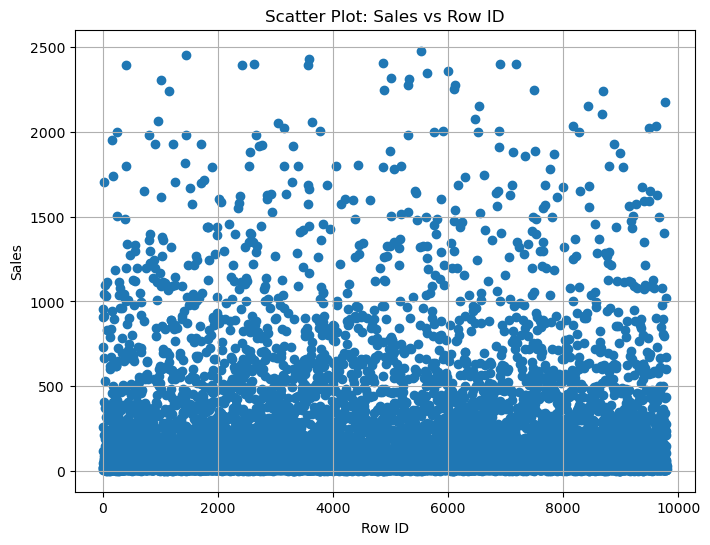

In [23]:
df02 = plot_after_quantile(df01, 0.99)
df02.reset_index(drop=True, inplace=True)


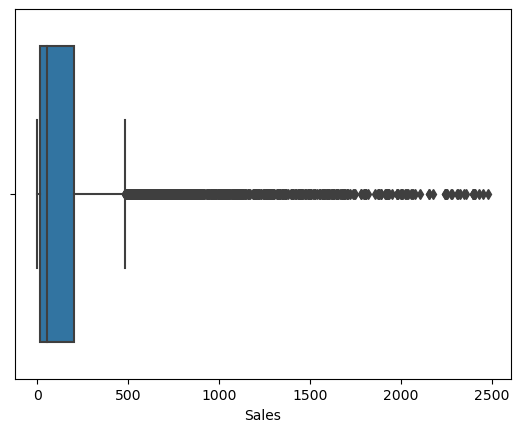

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a list or a pandas Series called 'data'
sns.boxplot(x=df02['Sales'])
plt.show()


## Splitting categorical and numerical columns

In [25]:
categorical = df02.select_dtypes(include=['object'])
numerical = df02.select_dtypes(include=['int', 'float'])

In [26]:
numerical

,Row ID,Sales,Order month,Order year
0,1,261.9600,8,2017
1,2,731.9400,8,2017
2,3,14.6200,12,2017
3,4,957.5775,11,2016
4,5,22.3680,11,2016
...,...,...,...,...
9685,9796,3.7980,5,2017
9686,9797,10.3680,12,2016
9687,9798,235.1880,12,2016
9688,9799,26.3760,12,2016


In [27]:
categorical

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St..."
9686,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip"
9687,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4
9688,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger


### Dropping columns ship date and ship mode from categorical 

In [28]:
categorical=categorical.drop(['Ship Date','Customer ID', 'City', 'Order ID', 'Product ID','Customer Name','Ship Mode','Country','Sub-Category','Product Name'],axis=1)

In [29]:
categorical.columns

Index(['Order Date', 'Segment', 'State', 'Region', 'Category'], dtype='object')

In [30]:
categorical= pd.get_dummies(categorical, columns=['Segment','State','Region','Category'])

In [31]:
categorical

,Order Date,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_West Virginia,State_Wisconsin,State_Wyoming,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,08/11/2017,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,08/11/2017,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,12/06/2017,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,11/10/2016,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,11/10/2016,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,21/05/2017,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9686,12/01/2016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9687,12/01/2016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9688,12/01/2016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Concat dataframes

In [32]:
final= pd.concat([numerical, categorical], axis=1)
final

,Row ID,Sales,Order month,Order year,Order Date,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Alabama,State_Arizona,...,State_West Virginia,State_Wisconsin,State_Wyoming,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,1,261.9600,8,2017,08/11/2017,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,731.9400,8,2017,08/11/2017,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,14.6200,12,2017,12/06/2017,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,4,957.5775,11,2016,11/10/2016,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,5,22.3680,11,2016,11/10/2016,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,9796,3.7980,5,2017,21/05/2017,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9686,9797,10.3680,12,2016,12/01/2016,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9687,9798,235.1880,12,2016,12/01/2016,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9688,9799,26.3760,12,2016,12/01/2016,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Yearly Model

In [33]:
columns_y = [ 'Order year',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'State_Alabama', 'State_Arizona', 'State_Arkansas', 'State_California',
       'State_Colorado', 'State_Connecticut', 'State_Delaware',
       'State_District of Columbia', 'State_Florida', 'State_Georgia',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine',
       'State_Maryland', 'State_Massachusetts', 'State_Michigan',
       'State_Minnesota', 'State_Mississippi', 'State_Missouri',
       'State_Montana', 'State_Nebraska', 'State_Nevada',
       'State_New Hampshire', 'State_New Jersey', 'State_New Mexico',
       'State_New York', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin', 'State_Wyoming', 'Region_Central', 'Region_East',
       'Region_South', 'Region_West', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology']

In [34]:
drop_c=final.drop(['Row ID','Order month'],axis=1)
yearly_sales=drop_c.set_index('Order year')
yearly_sales = yearly_sales.groupby(columns_y).sum().reset_index()


/var/folders/6x/86vt80p56r33nt6627tff6340000gn/T/ipykernel_75258/330348877.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sales = yearly_sales.groupby(columns_y).sum().reset_index()


## Yearly Model

In [35]:
features_yearly= [ 'Order year',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'State_Alabama', 'State_Arizona', 'State_Arkansas', 'State_California',
       'State_Colorado', 'State_Connecticut', 'State_Delaware',
       'State_District of Columbia', 'State_Florida', 'State_Georgia',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine',
       'State_Maryland', 'State_Massachusetts', 'State_Michigan',
       'State_Minnesota', 'State_Mississippi', 'State_Missouri',
       'State_Montana', 'State_Nebraska', 'State_Nevada',
       'State_New Hampshire', 'State_New Jersey', 'State_New Mexico',
       'State_New York', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin', 'State_Wyoming', 'Region_Central', 'Region_East',
       'Region_South', 'Region_West', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology']
target_yearly='Sales'

### Model Pipeline

In [36]:
from xgboost import XGBRegressor
import catboost as cb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

scaler = StandardScaler()

model_cb = cb.CatBoostRegressor(verbose=False)
model_xgb = XGBRegressor(verbosity=0)

pipeline_cb = Pipeline([
    ('scaler', scaler),
    ('model_cb', model_cb) 
])

pipeline_xgb = Pipeline([
    ('scaler', scaler), 
    ('model_xgb', model_xgb)
])

In [37]:
from sklearn.model_selection import train_test_split

X_train_year, X_test_year, y_train_year, y_test_year = yearly_sales.loc[yearly_sales['Order year'] != 2018][features_yearly], yearly_sales.loc[yearly_sales['Order year'] == 2018][features_yearly], yearly_sales.loc[yearly_sales['Order year'] != 2018][target_yearly],yearly_sales.loc[yearly_sales['Order year'] == 2018][target_yearly]

In [38]:
pipeline_cb.fit(X_train_year, y_train_year)
pipeline_xgb.fit(X_train_year, y_train_year)

y_pred_cb = pipeline_cb.predict(X_test_year)
y_pred_xgb = pipeline_xgb.predict(X_test_year)

y_pred_combined = 0.5 * y_pred_cb + 0.5 * y_pred_xgb

msle_cb = mean_squared_log_error(abs(y_test_year), abs(y_pred_cb), squared=False)
msle_xgb = mean_squared_log_error(abs(y_test_year), abs(y_pred_xgb), squared=False)
msle = mean_squared_log_error(abs(y_test_year), abs(y_pred_combined), squared=False)
print("Mean Squared Log Error for catboost:", msle_cb)
print("Mean Squared Log Error for xgboost:", msle_xgb)
print("Mean Squared Log Error", msle)


Mean Squared Log Error for catboost: 1.3130547938014017
Mean Squared Log Error for xgboost: 1.4825895026382636
Mean Squared Log Error 1.3748972248827356


R-squared (R2) for CatBoost: 0.69610010194404
R-squared (R2) for XGBoost: 0.6668382528432859
R-squared (R2) for Combined Model: 0.6847415230486447


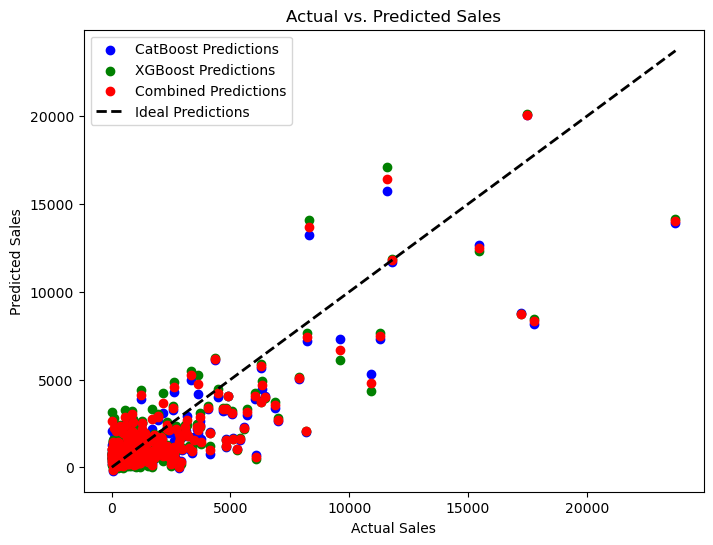

In [39]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Measure R2
r2_cb = r2_score(y_test_year, y_pred_cb)
r2_xgb = r2_score(y_test_year, y_pred_xgb)
r2_combined = r2_score(y_test_year, y_pred_combined)

print("R-squared (R2) for CatBoost:", r2_cb)
print("R-squared (R2) for XGBoost:", r2_xgb)
print("R-squared (R2) for Combined Model:", r2_combined)

# Plot graph
plt.figure(figsize=(8, 6))

# Scatter plot for CatBoost predictions
plt.scatter(y_test_year, y_pred_cb, color='blue', label='CatBoost Predictions')

# Scatter plot for XGBoost predictions
plt.scatter(y_test_year, y_pred_xgb, color='green', label='XGBoost Predictions')

# Scatter plot for Combined predictions
plt.scatter(y_test_year, y_pred_combined, color='red', label='Combined Predictions')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test_year), max(y_test_year)], [min(y_test_year), max(y_test_year)], color='black', linestyle='--', linewidth=2, label='Ideal Predictions')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


### Feature Importance : CatBoost

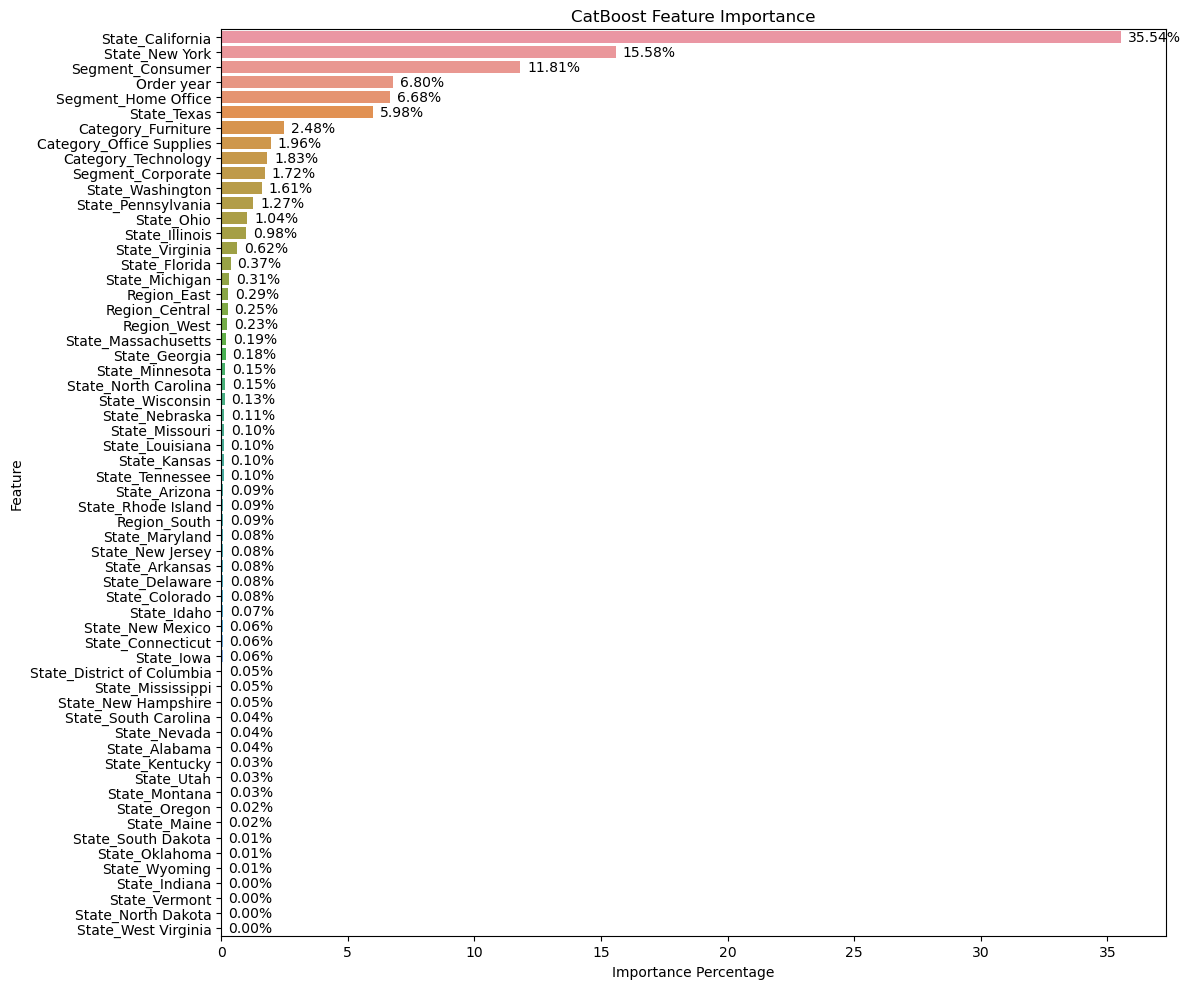

In [48]:
# Get feature importance scores from the CatBoost model
feature_importance_cb = pipeline_cb.named_steps['model_cb'].get_feature_importance()

# Calculate the sum of importance scores
total_importance_cb = feature_importance_cb.sum()

# Calculate the percentages of feature importance
percentages_cb = (feature_importance_cb / total_importance_cb) * 100

# Get the names of the features
features_cb = X_train_year.columns

# Create a DataFrame to store feature importance percentages along with their names
feature_importance_df_cb = pd.DataFrame({'Feature': features_cb, 'Importance Percentage': percentages_cb})

# Sort the DataFrame by importance percentage in descending order
feature_importance_df_cb = feature_importance_df_cb.sort_values(by='Importance Percentage', ascending=False)

# Plot the feature importance percentages
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance Percentage', y='Feature', data=feature_importance_df_cb)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.tight_layout()  # To adjust the margins
plt.subplots_adjust(left=0.2)  # Increase the left margin to avoid overlap
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.show()


In [51]:
# Get feature importance scores from the CatBoost model
feature_importance_cb = pipeline_cb.named_steps['model_cb'].get_feature_importance()

# Calculate the sum of importance scores
total_importance_cb = feature_importance_cb.sum()

# Calculate the percentages of feature importance
percentages_cb = (feature_importance_cb / total_importance_cb) * 100

# Get the names of the features
features_cb = X_train_year.columns

# Create a DataFrame to store feature importance percentages along with their names
feature_importance_df_cb = pd.DataFrame({'Feature': features_cb, 'Importance Percentage': percentages_cb})

# Sort the DataFrame by importance percentage in descending order
feature_importance_df_cb = feature_importance_df_cb.sort_values(by='Importance Percentage', ascending=False)

# Display the feature importance table for CatBoost
print("Feature Importance Table - CatBoost:")
feature_importance_df_cb


Feature Importance Table - CatBoost:


,Feature,Importance Percentage
7,State_California,35.539201
34,State_New York,15.575541
1,Segment_Consumer,11.807686
0,Order year,6.803590
3,Segment_Home Office,6.680150
45,State_Texas,5.984873
57,Category_Furniture,2.480031
58,Category_Office Supplies,1.962136
59,Category_Technology,1.826315
2,Segment_Corporate,1.722084


### Feature Importance : XGBoost

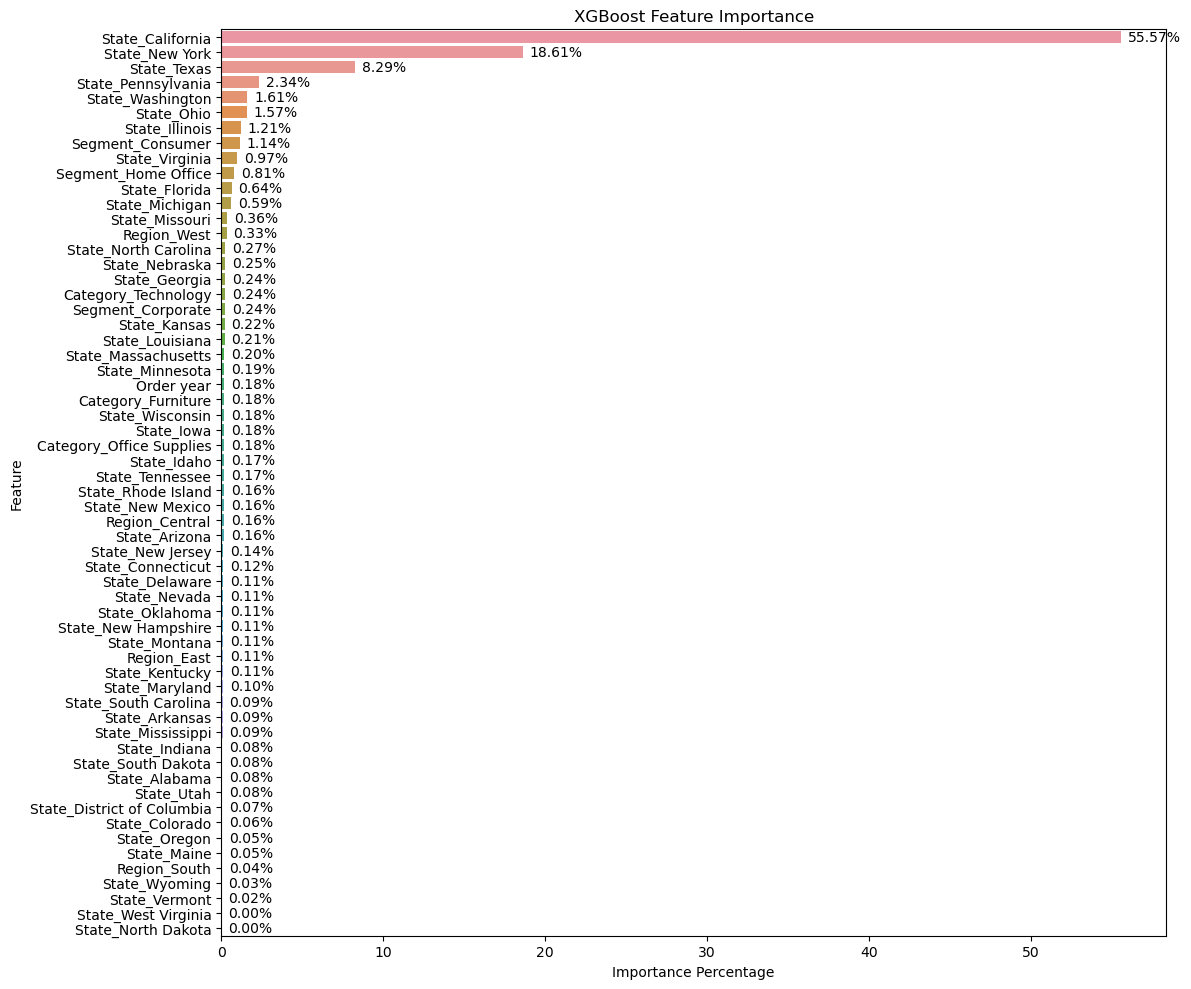

In [49]:
# Get feature importance scores from the XGBoost model
feature_importance_xgb = pipeline_xgb.named_steps['model_xgb'].feature_importances_

# Calculate the sum of importance scores
total_importance_xgb = feature_importance_xgb.sum()

# Calculate the percentages of feature importance
percentages_xgb = (feature_importance_xgb / total_importance_xgb) * 100

# Create a DataFrame to store feature importance percentages along with their names
feature_importance_df_xgb = pd.DataFrame({'Feature': features_yearly, 'Importance Percentage': percentages_xgb})

# Sort the DataFrame by importance percentage in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance Percentage', ascending=False)

# Plot the feature importance percentages
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance Percentage', y='Feature', data=feature_importance_df_xgb)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.tight_layout()  # To adjust the margins
plt.subplots_adjust(left=0.2)  # Increase the left margin to avoid overlap
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.show()


In [52]:
# Get feature importance scores from the XGBoost model
feature_importance_xgb = pipeline_xgb.named_steps['model_xgb'].feature_importances_

# Calculate the sum of importance scores
total_importance_xgb = feature_importance_xgb.sum()

# Calculate the percentages of feature importance
percentages_xgb = (feature_importance_xgb / total_importance_xgb) * 100

# Create a DataFrame to store feature importance percentages along with their names
feature_importance_df_xgb = pd.DataFrame({'Feature': features_yearly, 'Importance Percentage': percentages_xgb})

# Sort the DataFrame by importance percentage in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance Percentage', ascending=False)

# Display the feature importance table for XGBoost
print("Feature Importance Table - XGBoost:")
feature_importance_df_xgb


Feature Importance Table - XGBoost:


,Feature,Importance Percentage
7,State_California,55.574547
34,State_New York,18.608517
45,State_Texas,8.293872
40,State_Pennsylvania,2.343902
49,State_Washington,1.608458
37,State_Ohio,1.572589
15,State_Illinois,1.212133
1,Segment_Consumer,1.136476
48,State_Virginia,0.966401
3,Segment_Home Office,0.811451
